Loading the required modules and Prospector Reported Errors from a JSON file to a Panda DataFrame

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
prospector_data = pd.read_json('Prospector_report.json')
pd.set_option("display.max.columns", None)
import sys
!{sys.executable} -m pip install matplotlib

Dataframe Shape

In [359]:
print(prospector_data.shape)

(136, 4)


In [360]:
print(prospector_data.head())

   source                        code  \
0  pylint  missing-function-docstring   
1  pylint             too-many-locals   
2  pylint         too-many-statements   
3  mccabe                      MC0001   
4    pep8                        N816   

                                            location  \
0  {'path': 'index.py', 'module': 'index', 'funct...   
1  {'path': 'index.py', 'module': 'index', 'funct...   
2  {'path': 'index.py', 'module': 'index', 'funct...   
3  {'path': 'index.py', 'module': None, 'function...   
4  {'path': 'index.py', 'module': None, 'function...   

                                             message  
0               Missing function or method docstring  
1                   Too many local variables (28/15)  
2                       Too many statements (436/60)  
3                       blockify is too complex (57)  
4  variable 'push_to_IBMBC' in global scope shoul...  


    Information about the DataFrame

In [361]:
print(prospector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    136 non-null    object
 1   code      136 non-null    object
 2   location  136 non-null    object
 3   message   136 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB
None


Exploring distribution of errors among the tools that have generated them

In [362]:
source_based_analysis = prospector_data['source'].value_counts()
print(source_based_analysis)

pyflakes    96
pylint      33
pep8         5
pep257       1
mccabe       1
Name: source, dtype: int64


Visaulization of distribution of errors among the tools

<AxesSubplot:>

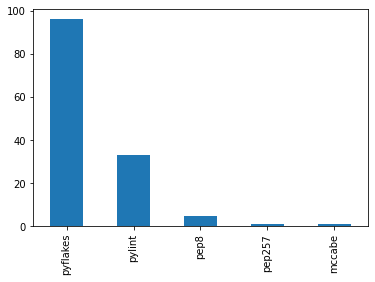

In [363]:
source_based_analysis.plot(kind='bar')

Exploring distribution of errors based on the error code

In [364]:
code_based_analysis = prospector_data['code'].value_counts()
print(code_based_analysis)

F405                          95
undefined-variable            12
missing-function-docstring     9
E501                           4
wrong-import-position          4
too-many-locals                1
F841                           1
too-many-statements            1
N816                           1
no-else-return                 1
missing-module-docstring       1
import-error                   1
MC0001                         1
D104                           1
unused-wildcard-import         1
unreachable                    1
unused-variable                1
Name: code, dtype: int64


Visaulization of distribution of errors based on error code

<AxesSubplot:>

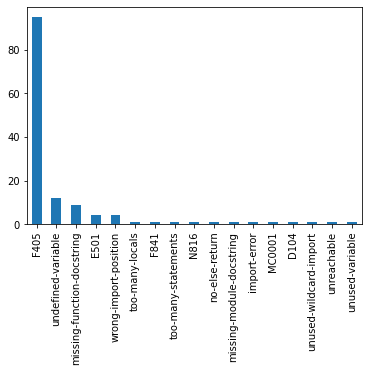

In [365]:
code_based_analysis.plot(kind='bar')

Exploring distribution of errors based on their location (the file that contains the error)
Mind the fact that the 'location' variable is a nested variable and has a JSON in it. Hence, we will flatten the JSON as a new dataframe

In [366]:
import json
from pandas.io.json import json_normalize 
location_based_analysis = json_normalize(prospector_data['location'])
print(location_based_analysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       136 non-null    object
 1   module     33 non-null     object
 2   function   27 non-null     object
 3   line       136 non-null    int64 
 4   character  136 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.4+ KB
None


<ipython-input-366-f5dc3d127d47>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  location_based_analysis = json_normalize(prospector_data['location'])


Distribution and Visualization of Distribution of errors based on the path

index.py       135
__init__.py      1
Name: path, dtype: int64


<AxesSubplot:>

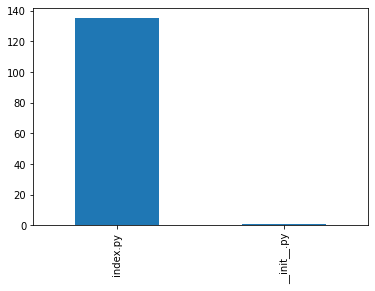

In [367]:
path_based_analysis = location_based_analysis['path'].value_counts()
print(path_based_analysis)
path_based_analysis.plot(kind='bar')

Distribution and Visualization of Distribution of errors based on the module

index    33
Name: module, dtype: int64


<AxesSubplot:>

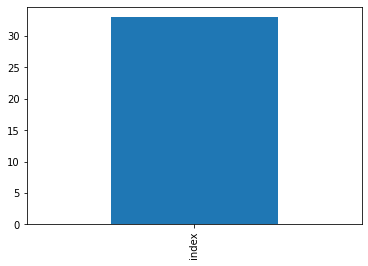

In [368]:
module_based_analysis = location_based_analysis['module'].value_counts()
print(module_based_analysis)
module_based_analysis.plot(kind='bar')

Distribution and Visualization of Distribution of errors based on the function

blockify         17
submit_digest     2
search_tb         2
displayStatus     1
verify_digest     1
verify_raw        1
search_b          1
verify_tb         1
submit_raw        1
Name: function, dtype: int64


<AxesSubplot:>

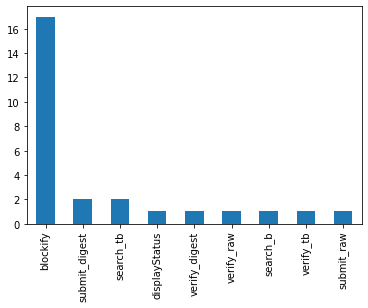

In [369]:
function_based_analysis = location_based_analysis['function'].value_counts()
print(function_based_analysis)
function_based_analysis.plot(kind='bar')

The 'blockify' function is the one that has the most number of violations, however, to simplify the time-consuming process of checking 17 violoations, we will focus on the function with second most number of viloations. We choose 'submit_digest' for further analysis.

In [395]:
function_analysis = json_normalize(prospector_data['location'])

# adding function element from the flattened location element to the main dataframe
prospector_data['function'] = function_analysis['function']

# selecting rows based on condition
submit_digest_analysis = prospector_data[prospector_data['function'] == 'submit_digest']
# The target lines for the two occurance of violations for submit_digest function
print(submit_digest_analysis)

     source                        code  \
126  pylint  missing-function-docstring   
127  pylint              no-else-return   

                                              location  \
126  {'path': 'index.py', 'module': 'index', 'funct...   
127  {'path': 'index.py', 'module': 'index', 'funct...   

                                  message       function  
126  Missing function or method docstring  submit_digest  
127     Unnecessary "else" after "return"  submit_digest  


<ipython-input-395-c47faf18f0b9>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  function_analysis = json_normalize(prospector_data['location'])
